In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np

In [2]:
file = r'C:\Users\daisy\Documents\data.xlsx'
def readExcel(store_type):
    grocery_col = [i for i in range(32) if i != 6 and i != 8 and i % 2 == 0 or i == 1]
    conven_col = [i for i in range(5,32) if i % 2 == 1 or i == 6]
    cols = []
    if store_type == 'grocery':
        for i in grocery_col: cols.append(i)
    if store_type == 'conven':
        for i in conven_col: cols.append(i)
    if store_type == 'both':
        for i in range(32): cols.append(i)
    xldata = pd.read_excel(file, sheet_name='Data', skiprows = 1, usecols = [i for i in cols])
    return xldata
all_data = readExcel('both')
grocery_data = readExcel('grocery')
conven_data = readExcel('conven')
conven_data = conven_data.sort_values(['conven_total'], ascending=False)
grocery_data = grocery_data.sort_values(['grocery_total'], ascending=False)

In [3]:
sns.set(font='Times New Roman', style='whitegrid')
fontdict={'fontsize': 22, 
          'horizontalalignment': 'right',
          'font':'Times New Roman',
         'weight':'bold'}

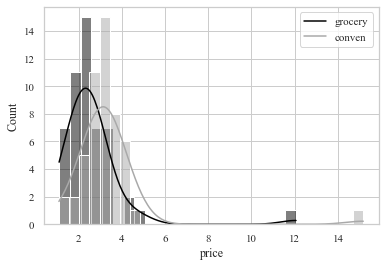

In [4]:
sns.histplot(data=grocery_data, x='grocery_total', color='black', kde=True)
sns.histplot(data=conven_data, x='conven_total', color='darkgrey', kde=True)
plt.xlabel('price')
plt.legend(['grocery', 'conven'])

(0.0, 6.5)

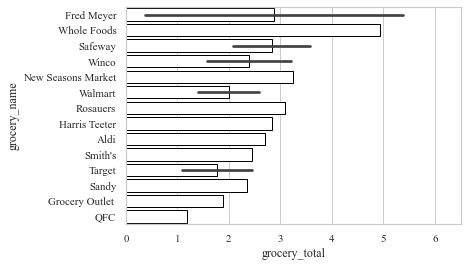

In [5]:
sns.barplot(x = 'grocery_total', y = 'grocery_name', data=grocery_data, ci='sd', color='w', edgecolor='black')
plt.xlim(0, 6.5)

(0.0, 6.5)

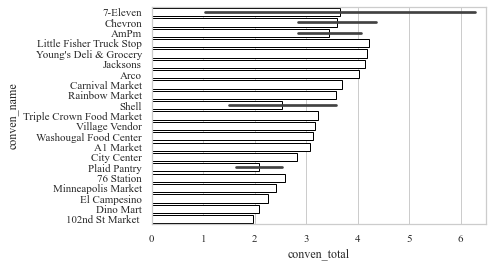

In [6]:
sns.barplot(x = 'conven_total', y = 'conven_name', data=conven_data, ci='sd', color='w', edgecolor='black')
plt.xlim(0, 6.5)

In [7]:
grocery_mean = grocery_data['grocery_total'].mean()
conven_mean = conven_data['conven_total'].mean()
type_mean = {'grocery': grocery_mean,
             'conven': conven_mean}
x_val = list(type_mean.keys())
y_val = list(type_mean.values())

(0.0, 3.5)

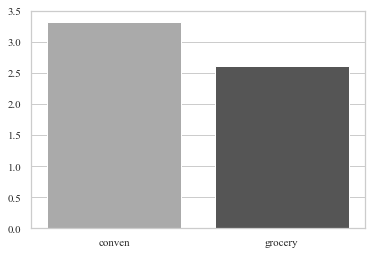

In [8]:
sns.barplot(x = x_val, y = y_val, palette = 'gray_r', order=['conven', 'grocery'])
plt.ylim(0, 3.5)

In [9]:
gas_stations = ['7-Eleven', 'AmPm', 'Arco', 'Chevron', 'Dino Mart', 
                'Little Fisher Truck Shop', 'Shell', 'Village Vendor', '76 Station']
indexed = conven_data.index.tolist()
stores_index = []

for x in gas_stations: stores_index.extend(conven_data.index[(conven_data['conven_name'] == x)].tolist())
for i in indexed:
    if i in stores_index: conven_data.at[i, 'type']='gas_station'
    else: conven_data.at[i, 'type']='market' 

<AxesSubplot:xlabel='type', ylabel='conven_total'>

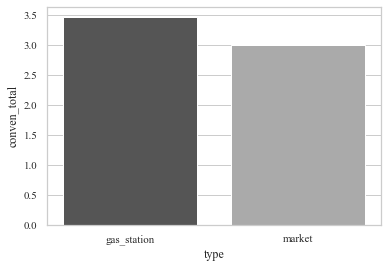

In [10]:
sns.barplot(data = conven_data, y = 'conven_total', x = 'type', ci=None, palette='gray')

<AxesSubplot:xlabel='type', ylabel='conven_total'>

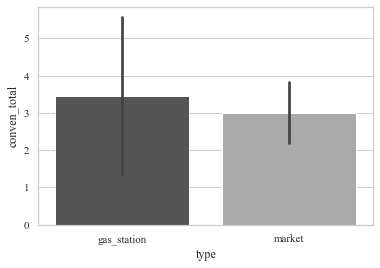

In [11]:
sns.barplot(data = conven_data, y = 'conven_total', x = 'type', ci='sd', palette='gray')

In [12]:
def stuffs(data):
    '''
    calculates stuff for datasets 
    '''
    mean = st.mean(data)
    median = st.median(data)
    mode = st.mode(data)
    stdev = st.stdev(data)
    n = len(data)
    q1 = int(n * (1/4))
    q2 = int(n * (1/2))
    q3 = int(n * (3/4))
    quart1 = st.median(data[0:q2])
    quart3 = st.median(data[q2:n])
    iqr = quart3 - quart1
    return mean, median, mode, stdev, iqr, quart1, quart3

In [13]:
gdata = grocery_data['grocery_total'].sort_values()
cdata = conven_data['conven_total'].sort_values()
print(stuffs(gdata))
print()
print(stuffs(cdata))

(2.6052349215686275, 2.355, 1.0909, 1.5678396157732826, 0.9634500000000004, 1.884, 2.8474500000000003)

(3.3276592352941177, 3.112, 2.636, 1.8463090996203815, 0.9432, 2.6583, 3.6015)


Text(0.5, 1.0, 'Grocery Figure 1')

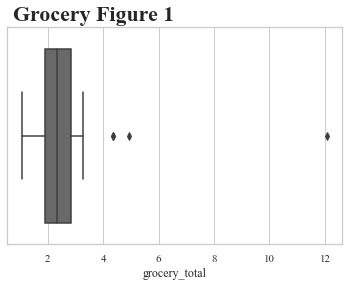

In [14]:
sns.boxplot(x=gdata, color='dimgrey').set_title('Grocery Figure 1',
                                               fontdict)

(0.0, 6.0)

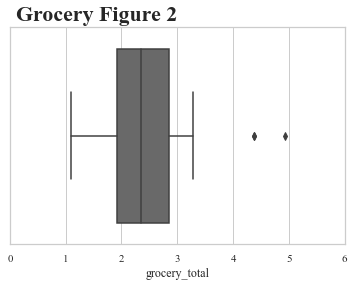

In [15]:
sns.boxplot(x=gdata, color='dimgrey').set_title('Grocery Figure 2',
                                               fontdict)
plt.xlim(0,6)

(1.0, 3.5)

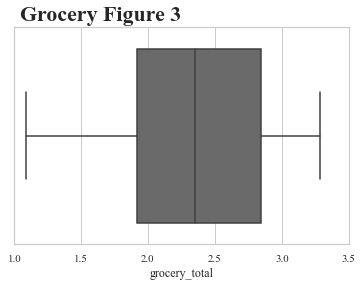

In [16]:
sns.boxplot(x=gdata, color='dimgrey').set_title('Grocery Figure 3',
                                               fontdict)
plt.xlim(1,3.5)

Text(0.5, 1.0, 'Conven Figure 1')

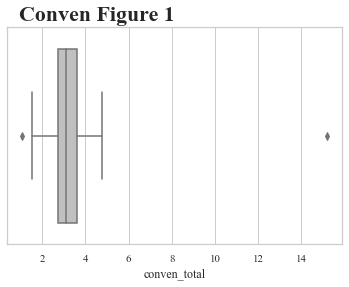

In [17]:
sns.boxplot(x=cdata, color='silver').set_title('Conven Figure 1',
                                              fontdict)

(0.0, 6.0)

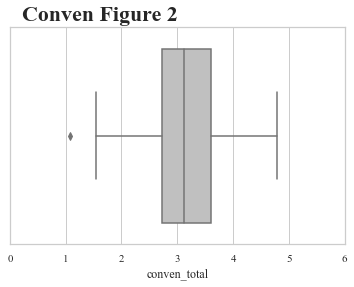

In [18]:
sns.boxplot(x=cdata, color='silver').set_title('Conven Figure 2',
                                              fontdict)
plt.xlim(0,6)

(1.3, 5.0)

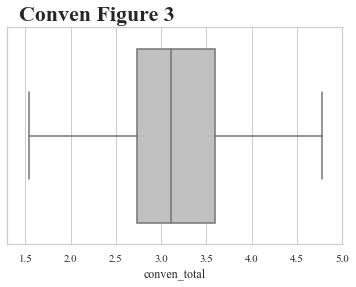

In [19]:
sns.boxplot(x=cdata, color='silver').set_title('Conven Figure 3',
                                              fontdict)
plt.xlim(1.3,5)

In [20]:
gas_rows = conven_data.index[(conven_data['type'] == 'gas_station')].tolist()
market_rows = conven_data.index[(conven_data['type'] == 'market')].tolist()
gas_data = conven_data.loc[gas_rows]['conven_total'].sort_values()
market_data = conven_data.loc[market_rows]['conven_total'].sort_values()
print(stuffs(gas_data))
print()
print(stuffs(market_data))

(3.46332225, 3.121, 2.893, 2.124859615883087, 0.7467994999999998, 2.8507005000000003, 3.5975)

(3.002068, 3.073, 1.5442, 0.8520632898625715, 1.38895, 2.2525, 3.64145)


Text(0.5, 0, 'gas_stations')

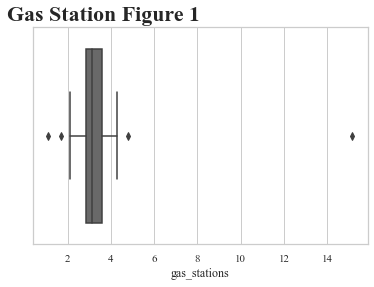

In [21]:
sns.boxplot(x=gas_data, color='dimgrey').set_title('Gas Station Figure 1',
                                                   fontdict)
plt.xlabel('gas_stations')

(1.0, 5.0)

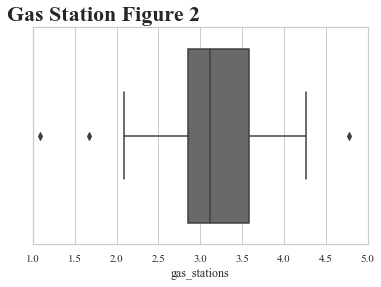

In [22]:
sns.boxplot(x=gas_data, color='dimgrey').set_title('Gas Station Figure 2',
                                                   fontdict)
plt.xlabel('gas_stations')
plt.xlim(1,5)

(2.0, 4.35)

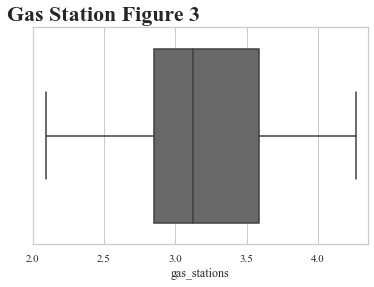

In [23]:
sns.boxplot(x=gas_data, color='dimgrey').set_title('Gas Station Figure 3',
                                                   fontdict)
plt.xlabel('gas_stations')
plt.xlim(2,4.35)

Text(0.5, 0, 'markets')

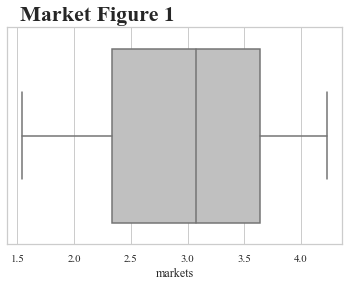

In [24]:
sns.boxplot(x=market_data, color='silver').set_title('Market Figure 1',
                                    fontdict)
plt.xlabel('markets')

(1.0, 5.0)

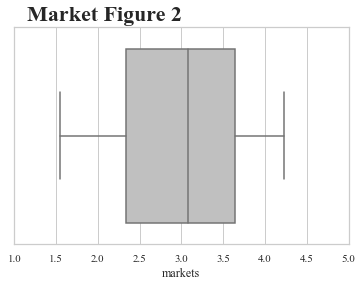

In [25]:
sns.boxplot(x=market_data, color='silver').set_title('Market Figure 2',
                                    fontdict)
plt.xlabel('markets')
plt.xlim(1,5)

(1.0, 5.0)

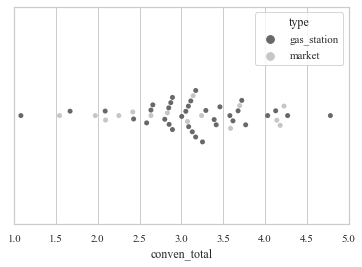

In [26]:
sns.swarmplot(x=conven_data['conven_total'], y=[""]*len(conven_data), hue=conven_data['type'], palette='Greys_r')
plt.xlim(1,5)